In [1]:
import matplotlib.pyplot as plt
plt.rc('text', usetex = True)

import numpy as np
import os

import sys
sys.path.insert(0, os.getcwd().removesuffix("/lane"))
from file_utils import readData
sys.path.pop(0)

dirpath = "//media/ashwin/One Touch/ashwin_md/lane/Apr2025/lmp"
figpath = "/home/ashwin/Desktop/ashwin_md/LD/imgs/Apr2025/lane"

In [ ]:
# Plot the laning order parameter (time_evolve)

nr_list = [22, 23, 24, 25, 26, 27]
Pe_list = [20, 40, 60, 80, 90, 100]

fig, ax = plt.subplots()
plt.ticklabel_format(style = "sci", axis = 'x', scilimits = (0,0))

mean = []
bounds = []
for i in range(len(nr_list)):
    fpath = os.path.join(dirpath, "Data{nr}".format(nr = nr_list[i]), "laneOrder.dat")
    [[time, order], _] = readData(fpath, 1)
    ax.plot(time, order, "-", ms =  2, lw = 0.8, label = r"${pe}$".format(pe = Pe_list[i]))

ax.axhline(y = 1.0, xmin = 0, xmax = 1, linestyle = "--", color = "k", lw = 0.8)
ax.set(xlim = (-1e4, 4e6), ylim = (0, 1.3))
ax.set_xlabel(r"$t~\bigg/\sigma \sqrt{\frac{m}{k_BT}}$", fontsize = 12)
ax.set_ylabel(r"$\phi_L$", fontsize = 12)
ax.set_xticks(np.arange(0, 4.1e6, 5e5))
ax.set_yticks(np.arange(0, 1.3, 0.1))
ax.legend(title = r"$Pe$", ncols = 2, fontsize = 8)

#fig.savefig(os.path.join(figpath, "lane_order.png"), dpi = 500, bbox_inches = "tight")

In [ ]:
# Plot the laning order parameter (time_evolve)

nr_list = [22, 23, 24, 25, 26, 27]
Pe_list = [20, 40, 60, 80, 90, 100]
alpMin = 0.2
alpMax = 1.0
alp = [alpMin, alpMin, alpMin, alpMin, alpMin, alpMax]

fig, ax = plt.subplots()
plt.ticklabel_format(style = "sci", axis = 'x', scilimits = (0,0))

mean = []
bounds = []
for i in range(len(nr_list)):
    fpath = os.path.join(dirpath, "Data{nr}".format(nr = nr_list[i]), "laneOrder.dat")
    [[time, order], _] = readData(fpath, 1)
    ax.plot(time, order, "-", ms =  2, lw = 0.8, alpha = alp[i], label = r"${pe}$".format(pe = Pe_list[i]))

    print(len(order))

    order = order[120:]
    mean.append(np.mean(order))
    bounds.append([-min(order) + mean[i], max(order) - mean[i]])

    if(alp[i] == alpMax):
        ax.axhline(min(order), xmin = 0, xmax = 1, ls = "--", color = "k", lw = 0.5)
        ax.axhline(max(order), xmin = 0, xmax = 1, ls = "--", color = "k", lw = 0.5)

ax.set(xlim = (-1e4, 4.1e6), ylim = (0, 1.3))
ax.set_xlabel(r"$t~\bigg/\sigma \sqrt{\frac{m}{k_BT}}$", fontsize = 12)
ax.set_ylabel(r"$\phi_L$", fontsize = 12)
ax.set_xticks(np.arange(0, 4.1e6, 5e5))
ax.set_yticks(np.arange(0, 1.3, 0.1))
ax.legend(title = r"$Pe$", ncols = 2, fontsize = 8)

# fig.savefig(os.path.join(figpath, "lane_order6.png"), dpi = 500, bbox_inches = "tight")

In [ ]:
# Plot the time-averaged lane order parameter with max and min bounds

fig2, ax2 = plt.subplots()

ax2.errorbar(Pe_list, mean, np.transpose(bounds), marker = "o", lw = 1, capsize = 5)
ax2.set_xlabel(r"$Pe$", fontsize = 12)
ax2.set_ylabel(r"$<\phi_L>$", fontsize = 12)
ax2.set_ylim((0, 1))
ax2.set_yticks(np.arange(0, 1.1, 0.1))

# fig2.savefig(os.path.join(figpath, "lane_order_bounds.png"), dpi = 500, bbox_inches = "tight")

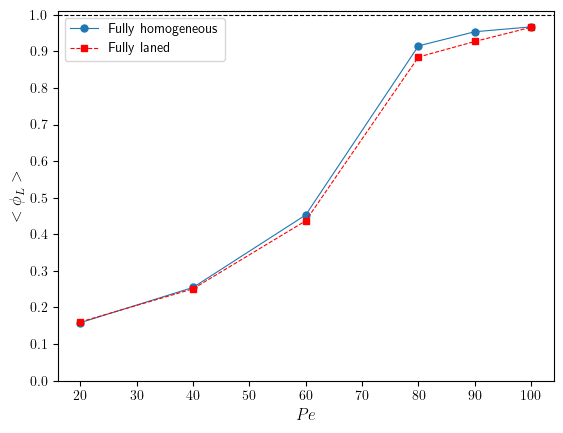

In [12]:
# Plot the time-averaged lane order parameter
# Comparison between fully mixed and perfectly-laned initial states

fig2, ax2 = plt.subplots()

[[nr_data, order_apr25], _] = readData(os.path.join(dirpath, "order_tavg.dat"), 1)

nr_list = [22, 23, 24, 25, 26, 27]
Pe_list = [20, 40, 60, 80, 90, 100]

y = []
for i in range(len(nr_list)):
    index = nr_data.index(nr_list[i])
    y.append(order_apr25[index])

ax2.plot(Pe_list, y, "o-", lw = 0.8, ms = 5, label = "Fully homogeneous")

nr_list = [28, 29, 30, 31, 32, 33]
Pe_list = [20, 40, 60, 80, 90, 100]

y = []
for i in range(len(nr_list)):
    index = nr_data.index(nr_list[i])
    y.append(order_apr25[index])

ax2.plot(Pe_list, y, "rs--", lw = 0.8, ms = 5, label = "Fully laned")
ax2.axhline(y = 1, xmin = 0, xmax = 1, lw = 0.8, color = "k", linestyle = "--")

ax2.set(ylim = (0, 1.01))
ax2.set_xlabel(r"$Pe$", fontsize = 12)
ax2.set_ylabel(r"$<\phi_L>$", fontsize = 12)
ax2.set_xticks(np.arange(20, 110, 10))
ax2.set_yticks(np.arange(0, 1.1, 0.1))
ax2.legend()

# fig2.savefig(os.path.join(figpath, "lane_order_init.png"), dpi = 500, bbox_inches = "tight")

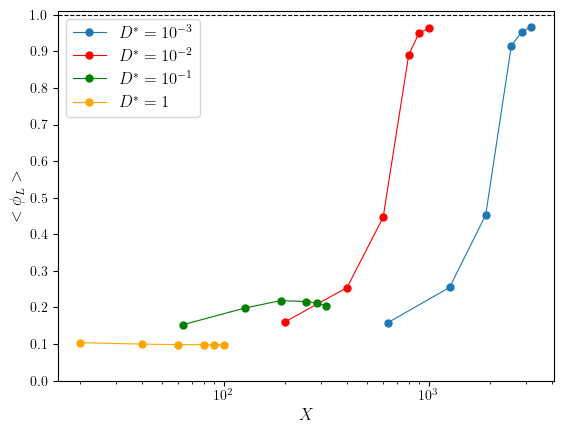

In [4]:
# Plot the time-averaged lane order parameter
# Comparison between different inertial times

ms = 5
D = [1e-3, 1e-2, 1e-1, 1e0]

fig2, ax2 = plt.subplots()

[[nr_data, order_apr25], _] = readData(os.path.join(dirpath, "order_tavg.dat"), 1)

nr_list = [22, 23, 24, 25, 26, 27]
Pe_list = [20, 40, 60, 80, 90, 100]
Pe_list = [i/np.sqrt(D[0]) for i in Pe_list]

y = []
for i in range(len(nr_list)):
    index = nr_data.index(nr_list[i])
    y.append(order_apr25[index])

ax2.semilogx(Pe_list, y, "o-", lw = 0.8, ms = ms, fillstyle = "full", label = r"$D^* = 10^{-3}$")

nr_list = [34, 35, 36, 37, 38, 39]
Pe_list = [20, 40, 60, 80, 90, 100]
Pe_list = [i/np.sqrt(D[1]) for i in Pe_list]

y = []
for i in range(len(nr_list)):
    index = nr_data.index(nr_list[i])
    y.append(order_apr25[index])

ax2.semilogx(Pe_list, y, "ro-", lw = 0.8, ms = ms, fillstyle = "full", label = r"$D^* = 10^{-2}$")

nr_list = np.arange(40, 46)
Pe_list = [20, 40, 60, 80, 90, 100]
Pe_list = [i/np.sqrt(D[2]) for i in Pe_list]

y = []
for i in range(len(nr_list)):
    index = nr_data.index(nr_list[i])
    y.append(order_apr25[index])

ax2.semilogx(Pe_list, y, "go-", lw = 0.8, ms = ms, fillstyle = "full", label = r"$D^* = 10^{-1}$")

nr_list = np.arange(46, 52)
Pe_list = [20, 40, 60, 80, 90, 100]
Pe_list = [i/np.sqrt(D[3]) for i in Pe_list]

y = []
for i in range(len(nr_list)):
    index = nr_data.index(nr_list[i])
    y.append(order_apr25[index])

ax2.semilogx(Pe_list, y, "o-", lw = 0.8, ms = ms, color = "orange", fillstyle = "full", label = r"$D^* = 1$")

ax2.axhline(y = 1, xmin = 0, xmax = 1, lw = 0.8, color = "k", linestyle = "--")

ax2.set(ylim = (0, 1.01))
# ax2.set_xlabel(r"$v_d^*$", fontsize = 12)
ax2.set_xlabel(r"$X$", fontsize = 12)
ax2.set_ylabel(r"$<\phi_L>$", fontsize = 12)
# ax2.set_xticks(np.arange(20, 110, 10))
ax2.set_yticks(np.arange(0, 1.1, 0.1))
ax2.legend(fontsize = 12)

# fig2.savefig(os.path.join(figpath, "lane_order_vd.png"), dpi = 500, bbox_inches = "tight")